[Epoch 0] train=0.268490 val=0.390900 loss=102586.722580 time: 14.643811
[Epoch 1] train=0.335998 val=0.446000 loss=91149.847092 time: 15.882497
[Epoch 2] train=0.376002 val=0.476000 loss=85951.367279 time: 14.593945
[Epoch 3] train=0.401062 val=0.492100 loss=82686.254196 time: 15.322698
[Epoch 4] train=0.413882 val=0.519000 loss=80880.771423 time: 15.536041
[Epoch 5] train=0.425020 val=0.535500 loss=79639.427094 time: 14.466631
[Epoch 6] train=0.441647 val=0.532500 loss=77663.955414 time: 15.641142
[Epoch 7] train=0.443289 val=0.556400 loss=77191.330124 time: 15.563410
[Epoch 8] train=0.455929 val=0.562100 loss=75794.167938 time: 15.328278
[Epoch 9] train=0.454828 val=0.580800 loss=75575.776138 time: 14.953981
[Epoch 10] train=0.462139 val=0.568800 loss=74966.309250 time: 14.524165
[Epoch 11] train=0.464062 val=0.552500 loss=74392.588928 time: 15.790582
[Epoch 12] train=0.464183 val=0.559400 loss=74291.695587 time: 14.402423
[Epoch 13] train=0.468650 val=0.591000 loss=73511.455139 tim

[Epoch 112] train=0.551863 val=0.673900 loss=62739.325714 time: 14.117221
[Epoch 113] train=0.553045 val=0.676400 loss=62664.141251 time: 14.051716
[Epoch 114] train=0.553165 val=0.677000 loss=62838.593643 time: 14.269506
[Epoch 115] train=0.551162 val=0.673600 loss=62912.440598 time: 14.705646
[Epoch 116] train=0.555048 val=0.677500 loss=62803.088364 time: 14.813357
[Epoch 117] train=0.546274 val=0.672200 loss=63607.674088 time: 14.307710
[Epoch 118] train=0.552244 val=0.677700 loss=62697.157936 time: 14.555049
[Epoch 119] train=0.551262 val=0.675200 loss=63028.598145 time: 14.036437
[Epoch 120] train=0.550200 val=0.671400 loss=62833.960701 time: 14.404433
[Epoch 121] train=0.550300 val=0.676700 loss=62957.450981 time: 14.308785
[Epoch 122] train=0.552684 val=0.675600 loss=62950.233948 time: 14.349599
[Epoch 123] train=0.553145 val=0.673800 loss=62554.344269 time: 14.150132
[Epoch 124] train=0.551863 val=0.677100 loss=62747.287117 time: 14.266820
[Epoch 125] train=0.549539 val=0.67370

[Epoch 222] train=0.555008 val=0.679800 loss=62158.751862 time: 15.025820
[Epoch 223] train=0.554527 val=0.676300 loss=62547.894897 time: 15.128544
[Epoch 224] train=0.555268 val=0.681500 loss=62190.241829 time: 14.953014
[Epoch 225] train=0.558113 val=0.681200 loss=61970.591370 time: 15.154443
[Epoch 226] train=0.559696 val=0.680700 loss=61901.775673 time: 15.099591
[Epoch 227] train=0.556550 val=0.679900 loss=62295.063179 time: 15.309059
[Epoch 228] train=0.558333 val=0.679200 loss=62186.669983 time: 16.402972
[Epoch 229] train=0.556430 val=0.678900 loss=62278.612793 time: 14.850290
[Epoch 230] train=0.555288 val=0.680100 loss=62320.408234 time: 14.430382
[Epoch 231] train=0.553786 val=0.679800 loss=62113.891434 time: 15.204336
[Epoch 232] train=0.557632 val=0.681300 loss=62147.625580 time: 14.030452
[Epoch 233] train=0.559535 val=0.678000 loss=62106.066406 time: 14.116223
[Epoch 234] train=0.556931 val=0.681300 loss=62437.752922 time: 14.177348
[Epoch 235] train=0.557332 val=0.68010

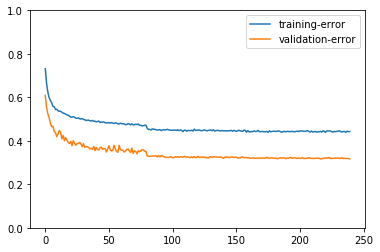

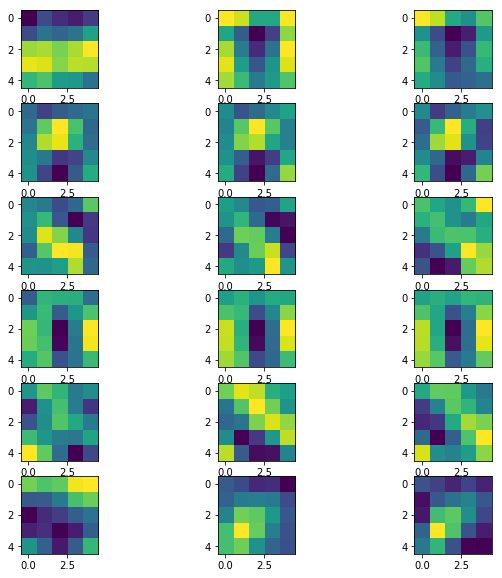

In [7]:
"""
Network Structure
-----------------

First, let's import the necessary libraries into python.

"""
from __future__ import division

%matplotlib inline
import matplotlib.pyplot as plt

import argparse, time, logging, random, math

import numpy as np
import mxnet as mx

from math import sqrt

from mxnet import gluon, nd
from mxnet import autograd as ag
from mxnet.gluon import nn
from mxnet.gluon.data.vision import transforms

from gluoncv.model_zoo import get_model
from gluoncv.utils import makedirs, TrainingHistory


state = [];
names = [];

class MyInit(mx.init.Initializer):
    def __init__(self):
        super(MyInit, self).__init__()
        self._verbose = True
    def _init_weight(self, _, arr):
        v = mx.ndarray.zeros(shape = arr.shape)
        s = mx.ndarray.zeros(shape = arr.shape)
        global state 
        state = state + [(v,s)]
        global names
        names = names+[_]
        if (len(arr.shape) == 2):
            mx.ndarray.random.normal(loc=0, scale=sqrt(2/arr.shape[0]) ,out=arr)
#         else:
#             if (arr.shape[0] == 6):
#                 mx.ndarray.random.normal(loc=0, scale=sqrt(2/(32*32*6)) ,out=arr)
#             else:
#                 mx.ndarray.random.normal(loc=0, scale=sqrt(2/(16*16*16)) ,out=arr)
        else:
            if (arr.shape[0] == 6):
                mx.ndarray.random.normal(loc=0, scale=sqrt(2/(28*28*6)) ,out=arr)
            else:
                if (arr.shape[0] == 16):
                    mx.ndarray.random.normal(loc=0, scale=sqrt(2/(10*10*16)) ,out=arr)
                else:
                    mx.ndarray.random.normal(loc=0, scale=sqrt(2/(8*8*32)) ,out=arr)

class MyRanInit(mx.init.Initializer):
    def __init__(self):
        super(MyRanInit, self).__init__()
        self._verbose = True
    def _init_weight(self, _, arr):
        mx.ndarray.random.normal(loc=0, scale=0.1 ,out=arr)
        
        

###########################################################
#
# There are numerous structures for convolutional neural networks.
# Here we pick a simple yet well-performing structure, ``cifar_resnet20_v1``, for the
# tutorial.

# number of GPUs or CPU to use if you have
num_gpus = 1
#ctx = [mx.gpu(i) for i in range(num_gpus)]

ctx = [mx.gpu(0)]


############################################################
# your code here to define your net according to problem 2 #
net = nn.Sequential()

# conv1 = nn.Conv2D(6, kernel_size=3, strides=1,padding = 1)
# conv4 = nn.Conv2D(6, kernel_size=3, strides=1,padding = 1)

# conv2 = nn.Conv2D(16, kernel_size=3, strides=1,padding = 1)
# conv3 = nn.Conv2D(16, kernel_size=3, strides=1,padding = 1)
# conv5 = nn.Conv2D(16, kernel_size=3, strides=1,padding = 1)

# fc1 = nn.Dense(128)
# fc2 = nn.Dense(84)
# fc3 =  nn.Dense(10)

# net.add(
#         conv1,
#         nn.BatchNorm(),
#         nn.Activation(activation='relu'),
#         conv4,
#         nn.BatchNorm(),
#         nn.Activation(activation='relu'),
#         nn.MaxPool2D(pool_size=2, strides=2),

#         conv2,
#         nn.BatchNorm(),
#         nn.Activation(activation='relu'),
    
#         conv3,
#         nn.BatchNorm(),
#         nn.Activation(activation='relu'),
#         conv5,
#         nn.BatchNorm(),
#         nn.Activation(activation='relu'),
#         nn.MaxPool2D(pool_size=2, strides=2),
    
#         fc1, 
#         nn.BatchNorm(),
#         nn.Activation(activation='relu'),nn.Dropout(0.01),
#         fc2,
#         nn.BatchNorm(), 
#         nn.Activation(activation='relu'),nn.Dropout(0.01),
#         fc3)




# params = [conv1,conv4,conv2,conv3,conv5,fc1,fc2,fc3]




conv1 = nn.Conv2D(6, kernel_size=5, strides=1)

conv2 = nn.Conv2D(16, kernel_size=5, strides=1)

fc1 = nn.Dense(128)
fc2 = nn.Dense(84)
fc3 =  nn.Dense(10)

net.add(
       conv1,
       nn.BatchNorm(),
       nn.Activation(activation='relu'),
       nn.MaxPool2D(pool_size=2, strides=2),

       conv2,
       nn.BatchNorm(),
       nn.Activation(activation='relu'),
       nn.MaxPool2D(pool_size=2, strides=2),

       fc1, 
       nn.BatchNorm(),
       nn.Activation(activation='relu'),nn.Dropout(0.05),
       fc2,
       nn.BatchNorm(), 
       nn.Activation(activation='relu'),nn.Dropout(0.05),
       fc3)

params = [conv1,conv2,fc1,fc2,fc3]
############################################################
# your code here to do initialization using existing API #



#net.initialize()

#net.initialize(mx.init.Xavier(), ctx=ctx)

net.initialize(MyInit(), ctx=ctx)

#net.initialize(MyRanInit(), ctx=ctx)




################################################################
# Data Augmentation and Data Loader
# ---------------------------------
#
# Data augmentation is a common technique used for training. It is
# base on the assumption that, for the same object, photos under different
# composition, lighting condition, or color should all yield the same prediction.
#
# Here are photos of the Golden Bridge, taken by many people,
# at different time from different angles.
# We can easily tell that they are photos of the same thing.
#
# |image-golden-bridge|
#
# We want to teach this invariance to our model, by playing "augmenting"
# input image. Our augmentation transforms the image with
# resizing, cropping, flipping and other techniques.
#
# With ``Gluon``, we can create our transform function as following:

transform_train = transforms.Compose([
    # Randomly crop an area, and then resize it to be 32x32
    transforms.RandomResizedCrop(32),
    # Randomly flip the image horizontally
    transforms.RandomFlipLeftRight(),
    # Randomly jitter the brightness, contrast and saturation of the image
    transforms.RandomColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
    # Randomly adding noise to the image
    transforms.RandomLighting(0.1),
    # Transpose the image from height*width*num_channels to num_channels*height*width
    # and map values from [0, 255] to [0,1]
    transforms.ToTensor(),
    # Normalize the image with mean and standard deviation calculated across all images
    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
])

################################################################
# You may have noticed that most of the operations are randomized. This in effect
# increases the number of different images the model sees during training.
# The more data we have, the better our model generalizes over
# unseen images.
#
# On the other hand, when making prediction, we would like to remove all
# random operations in order to get a deterministic result. The transform
# function for prediction is:

transform_test = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
])

################################################################
# Note that it is important to keep the normalization step, since the
# model only works well on inputs from the same distribution.
#
# With the transform functions, we can define data loaders for our
# training and validation datasets.

# Batch Size for Each GPU
per_device_batch_size = 128
# Number of data loader workers
num_workers = 0
# Calculate effective total batch size
batch_size = per_device_batch_size * num_gpus

# Set train=True for training data
# Set shuffle=True to shuffle the training data
train_data = gluon.data.DataLoader(
    gluon.data.vision.CIFAR10(train=True).transform_first(transform_train),
    batch_size=batch_size, shuffle=True, last_batch='discard', num_workers=num_workers)

# Set train=False for validation data
val_data = gluon.data.DataLoader(
    gluon.data.vision.CIFAR10(train=False).transform_first(transform_test),
    batch_size=batch_size, shuffle=False, num_workers=num_workers)

################################################################
# Optimizer, Loss and Metric
# --------------------------
#
# Optimizer improves the model during training. Here we use the popular
# Nesterov accelerated gradient descent algorithm.

# Learning rate decay factor
lr_decay = 0.1
# Epochs where learning rate decays
lr_decay_epoch = [80, 160, np.inf]

# standard SGD gradient descent
optimizer = 'sgd'
#optimizer = 'adam'
# Set parameters
optimizer_params = {'learning_rate': 0.01, 'wd': 0.0005, 'momentum': 0.9}
#optimizer_params = {'learning_rate': 0.001}
# Define our trainer for net
trainer = gluon.Trainer(net.collect_params(), optimizer, optimizer_params)



def adam(states, hyperparams):
    hp, beta1, beta2, eps = hyperparams, 0.9, 0.999, 1e-6
    l = len(params)
    for i in range(0,l):
        v,s = states[i]
        p = params[i].weight
        v[:] = beta1 * v + (1 - beta1) * p.grad()
        s[:] = beta2 * s + (1 - beta2) * p.grad().square()
        
        v_bias_corr = v / (1 - beta1 ** hp['t'])
        s_bias_corr = s / (1 - beta2 ** hp['t'])

        p.data()[:] -= hp['lr'] * v_bias_corr / (s_bias_corr.sqrt() + eps)
    hp['t'] = hp['t']+1
    

    
    

################################################################
# In the above code, ``lr_decay`` and ``lr_decay_epoch`` are not directly
# used in ``trainer``. One important idea in model training is to
# gradually decrease learning rate. This means the optimizer takes large
# steps at the beginning, but step size becomes smaller and smaller in time.
#
#
# In order to optimize our model, we need a loss function.
# In essence, loss functions compute the difference between predictions and the
# ground-truth as a measure of model performance.
# We can then take the gradients of the loss w.r.t. the weights.
# Gradients points the optimizer to the direction weights should move to
# improve model performance.
#
# For classification tasks, we usually use softmax cross entropy as the
# loss function.

loss_fn = gluon.loss.SoftmaxCrossEntropyLoss()


################################################################
# Metrics are similar to loss functions, but they are different in the
# following aspects:
#
# -  Metric is how we evaluate model performance. Each metric is related to a
#    specific task, but independent from the model training process.
# -  For classification, we usually only use one loss function to train
#    our model, but we can have several metrics for evaluating
#    performance.
# -  Loss function can be used as a metric, but sometimes its values are hard
#    to interpretate. For instance, the concept "accuracy" is
#    easier to understand than "softmax cross entropy"
#
# For simplicity, we use accuracy as the metric to monitor our training
# process. Besides, we record metric values, and will print them at the
# end of training.

train_metric = mx.metric.Accuracy()
train_history = TrainingHistory(['training-error', 'validation-error'])

################################################################
# Validation
# ----------
#
# Validation dataset provides us a way of monitoring the training process.
# We have labels for validation data, but they are held out during training.
# Instead, we use them to evaluate the models performance on unseen data
# and prevent overfitting.

def test(ctx, val_data):
    metric = mx.metric.Accuracy()
    for i, batch in enumerate(val_data):
        data = gluon.utils.split_and_load(batch[0], ctx_list=ctx, batch_axis=0)
        label = gluon.utils.split_and_load(batch[1], ctx_list=ctx, batch_axis=0)
        outputs = [net(X) for X in data]
        metric.update(label, outputs)
    return metric.get()

################################################################
# In order to evaluate performance, we need a metric. Then, we loop
# through the validation data and predict with our model.
# We'll run this function at the end of every epoch to show improvement.
# over the last epoch.
#
# Training
# --------
#
# After all the preparations, we can finally start training!
# Following is the script.
#
# .. note::
#   In order to finish the tutorial quickly, we only train for 3 epochs.
#   In your experiments, we recommend setting ``epochs=240``.

epochs = 240
lr_decay_count = 0
hp = {'t':1,'flag':0,'lr':0.01}


for epoch in range(epochs):
    tic = time.time()
    train_metric.reset()
    train_loss = 0
    
    # Learning rate decay
    if epoch == lr_decay_epoch[lr_decay_count]:
        trainer.set_learning_rate(trainer.learning_rate*lr_decay)
        hp['lr'] = hp['lr']*lr_decay
        lr_decay_count += 1

    # Loop through each batch of training data
    for i, batch in enumerate(train_data):
        # Extract data and label
        data = gluon.utils.split_and_load(batch[0], ctx_list=ctx, batch_axis=0)
        label = gluon.utils.split_and_load(batch[1], ctx_list=ctx, batch_axis=0)

        # AutoGrad
        with ag.record():
            output = [net(X) for X in data]
            loss = [loss_fn(yhat, y) for yhat, y in zip(output, label)]

        # Backpropagation
        for l in loss:
            l.backward()

        # Optimize
        #trainer.step(batch_size)
        adam(state,hp)
        # Update metrics
        train_loss += sum([l.sum().asscalar() for l in loss])
        train_metric.update(label, output)

    name, acc = train_metric.get()
    # Evaluate on Validation data
    name, val_acc = test(ctx, val_data)

    # Update history and print metrics
    train_history.update([1-acc, 1-val_acc])
    print('[Epoch %d] train=%f val=%f loss=%f time: %f' %
        (epoch, acc, val_acc, train_loss, time.time()-tic))




# We can plot the metric scores with:

###############################################################
# your code here to plot the training curve and test accuracy #

for p in net.params:
    print(p.shape)





train_history.plot(save_path='out.png')






###############################################################
# your code here to save parameters and visualize the ﬁlters  #

net.save_parameters('params.params')

print(conv1.weight)

fig=plt.figure(figsize=(10,10))

for i in range(0,6):
    for j in range(0,3):
        img = conv1.weight.data()[i,j,:,:].asnumpy()
        #print(img)
        a = np.amin(img)
        b = np.amax(img)
        
        img = (img-b)/(a-b)*255
        fig.add_subplot(6, 3, i*3+j+1)
        plt.imshow(img)
        #print((img-min(img))
plt.show()
fig.savefig("plot.jpg")